<strong> TMDB 5000 Movie Dataset
Metadata on ~5,000 movies from TMDb </strong>
<p>What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?</p>

<p>This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films. </p>


**Data Description**
**id** - Integer unique id of each movie

**belongs_to_collection** - Contains the TMDB Id, Name, Movie Poster and Backdrop URL  of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/<Poster_path_here>. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

**budget**:Budget of a movie in dollars. 0 values mean unknown. 

**genres** : Contains all the Genres Name & TMDB Id in JSON Format

**homepage** - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/	, this is the homepage of Whiplash movie.

**imdb_id** - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/<imdb_id_here>

**original_language** - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french. 

**original_title** - The original title of a movie. Title & Original title may differ, if the original title is not in English. 

**overview** - Brief description of the movie.

**popularity** -  Popularity of the movie in float. 

**poster_path** - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/<Poster_path_here>

**production_companies** - All production company name and TMDB id in JSON format of a movie.

**production_countries** - Two digit code and full name of the production company in JSON format.

**release_date** - Release date of a movie in mm/dd/yy format.

**runtime** - Total runtime of a movie in minutes (Integer).

**spoken_languages** - Two digit code and full name of the spoken language. 

**status** - Is the movie released or rumored? 

**tagline** - Tagline of a movie 

**title** - English title of a movie

**Keywords** - TMDB Id and name of all the keywords in JSON format. 

**cast** - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

**crew** - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc. 

**revenue** - Total revenue earned by a movie in dollars. 

In [1]:
import numpy as np
import json
import datetime
from wordcloud import WordCloud
from math import floor
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings("ignore")


In [2]:
movie_df = pd.read_csv('data/movies/tmdb_5000_movies.csv')
credits_df = pd.read_csv('data/movies/tmdb_5000_credits.csv')

In [3]:
movie_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits_df.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Preprocessing stage

In [5]:
combine = pd.merge(movie_df, credits_df, left_on = 'id', right_on = 'movie_id') #merge by id

In [6]:
def process_df(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    json_cols = ['genres', 'keywords', 'production_countries', \
                 'production_companies', 'spoken_languages', 'cast', 'crew']
    for col in json_cols:
        df[col] = df[col].apply(json.loads) #Load the JSON columns
    return df
final_movies_df = process_df(combine)


del final_movies_df['movie_id'], final_movies_df['id'] #No need for the id of the movies once the tables are joined
del final_movies_df['title_x'] #not needed (rendundancy of two titles because of merge)
del final_movies_df["tagline"]  
final_movies_df.rename(columns={'title_y':'title'}, inplace=True) #rename col
final_movies_df = final_movies_df[final_movies_df['status'] == 'Released'] #keep only released movies
del final_movies_df['status'], final_movies_df['original_title'] #no need for these columns anymore

In [7]:
final_movies_df.head()

,budget,genres,homepage,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,title,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


#### Extracting a homepage variable

In [8]:

#we will need the homepage corrolation later on
final_movies_df['has_homepage'] = 0
final_movies_df.loc[final_movies_df['homepage'].isnull() == False, 'has_homepage'] = 1
final_movies_df = final_movies_df.drop(['homepage'], axis = 1) #no need for the link anymore

#### Cleaning the budget and runtime variables

In [9]:
final_movies_df.loc[final_movies_df["budget"] == 0.0, "budget"] = final_movies_df["budget"].mean() #mean for null values
final_movies_df.loc[final_movies_df["runtime"] == 0.0, "runtime"] = final_movies_df["runtime"].mean() #mean for null values

#### Extracting date related informations and calculating profits

In [10]:
final_movies_df["year"] = final_movies_df["release_date"].dt.year #get year
final_movies_df["month"] = final_movies_df["release_date"].dt.month #get month 
final_movies_df["day"] = final_movies_df["release_date"].dt.day #get day
final_movies_df["dow"] = final_movies_df["release_date"].dt.dayofweek #get dow for visualization
final_movies_df["profit"] = final_movies_df["revenue"] - final_movies_df["budget"] #calculate profit

In [11]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"
final_movies_df= final_movies_df.fillna(0)
final_movies_df["decade"] = final_movies_df["year"].apply(extract_decade)
final_movies_df = final_movies_df[(final_movies_df['decade'] != '1910s') & (final_movies_df['decade'] != '0s')] #outliers
final_movies_df = final_movies_df.sort_values(by=['decade'], ascending=True)

### Most popular movie prior to 2015

In [12]:
pop = final_movies_df["popularity"].idxmax()
print(final_movies_df.loc[pop][['title','profit','year','vote_average']])

title                Minions
profit          1082730962.0
year                  2015.0
vote_average             6.4
Name: 546, dtype: object


#### conclusion:
Somehow am not even surprised, that movie blew up really hard (and that's why now it's a whole franchise). But one thing really stands out, the average rating is 6.4. By no means I'd go as far as saying a movie with 6.5 stars would be bad, but somehow it's the most popular one. One thing I can think of is the fact that movies blew up with children more than adults. Yet, I highly doubt most kids would have access to voting movies nor would they really care about doing that. This might be why the vote average is weighed down by the "harsher" criticism of adults. What do you think? 

### Runtime description

In [13]:
print('The run time statistics are as follows')
print(final_movies_df["runtime"].describe()[['mean','std','25%','50%','75%','max']])
max_runtime_id = final_movies_df["runtime"].idxmax() #locate the movie with the max runtime
print(final_movies_df.loc[max_runtime_id][['title','runtime','year']])

The run time statistics are as follows
mean    107.610098
std      20.758394
25%      94.000000
50%     104.000000
75%     118.000000
max     338.000000
Name: runtime, dtype: float64
title      Carlos
runtime     338.0
year       2010.0
Name: 2384, dtype: object


##### runtime description:
The average run time of movies is ~107-108 minutes and shares a median relatively close to the average. While the standard deviation and 25%-75% ranges indicate that the runtime is can still vary by a long shot from the mean/median. This is proven by the length of max length which is at a huge 338 minutes. Of course, out of curiosity, I wanted to know about the movie that ran for more than 5 and a half hours! This can be done via the idxmax function that can extract the index of the maximum value.

### Top 10 movies with the Highest average votes

In [14]:
top = final_movies_df.nlargest(10,'vote_average')
print('Most voted')
top[['title','year','vote_average']]

Most voted


,title,year,vote_average
3519,Stiff Upper Lips,1998.0,10.0
4045,"Dancer, Texas Pop. 81",1998.0,10.0
4247,Me You and Five Bucks,2015.0,10.0
3992,Sardaarji,2015.0,9.5
2386,One Man's Hero,1999.0,9.3
1881,The Shawshank Redemption,1994.0,8.5
2970,There Goes My Baby,1994.0,8.5
2796,The Prisoner of Zenda,1937.0,8.4
3337,The Godfather,1972.0,8.4
2731,The Godfather: Part II,1974.0,8.3


##### conclusion
There are two things that stood out to me. First one, the hailing of the 1900s movies is still quite a dominant opinion as I thought it is. 8 out of the top 10 movies are from before the 21st century. And the second one is that out of almost 5000 movies, only 3 made it with a perfect rating!! And that's no exaggeration considering that the 4th is at 9.5. One would imagine that there would be a competition in the high 9 stars. Be reminded though, that this is only limited to the movies in the dataset. I am pretty sure that TMDB's current website would show different results.

###  Top 10 movies with the highest profits

In [15]:
most_profits = final_movies_df.nlargest(10,'profit')
most_profits[['title','profit','year','vote_average']]

,title,profit,year,vote_average
0,Avatar,2.550965e+09,2009.0,7.2
25,Titanic,1.645034e+09,1997.0,7.5
28,Jurassic World,1.363529e+09,2015.0,6.5
44,Furious 7,1.316249e+09,2015.0,7.3
16,The Avengers,1.299558e+09,2012.0,7.4
7,Avengers: Age of Ultron,1.125404e+09,2015.0,7.3
124,Frozen,1.124219e+09,2013.0,7.3
546,Minions,1.082731e+09,2015.0,6.4
329,The Lord of the Rings: The Return of the King,1.024889e+09,2003.0,8.1
31,Iron Man 3,1.015440e+09,2013.0,6.8


##### conclusion
I think we all know how huge the avatar movie was (Even though I myself didn't watch the movie). The most amazing thing to see here is that the Titanic movie is standing tall at 2nd place even though most of its popularity was in the 2000s. This is a huge feat because we have to take into account the inflation of money throughout the last 2 decades. Another thing to note is the fact that the vote_average and profit aren't really correlated(when it comes to the top movies at least).

### Let's make a wordcloud of genres

4793


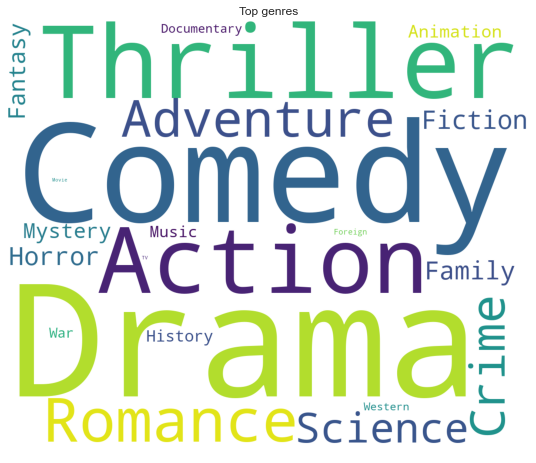

In [16]:
list_of_genres = list(final_movies_df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values) #Our columns are now lists with dictionnaries embedded (we extract the names from them)
print(len(list_of_genres))
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
# print(text)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text) 
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

#### Note
According to the word cloud, the most present genres in the dataset are Drama, Comedy, Thriller, and romance.

### Profits per year

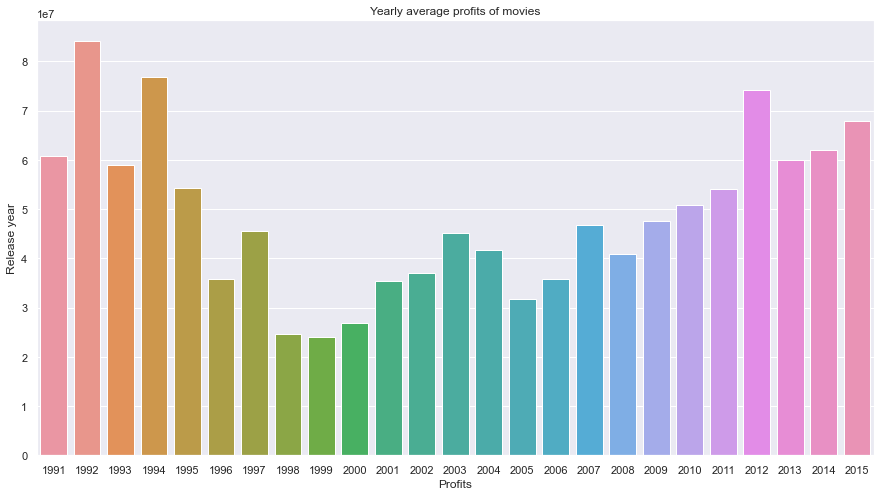

In [28]:
profits_per_year = final_movies_df[(final_movies_df["year"]>1990) & (final_movies_df["year"] <2016)].groupby("year").agg({"profit":"mean"})
profits_per_year.index = profits_per_year.index.astype(int)

sns.barplot(profits_per_year.index,y='profit',data=profits_per_year)
plt.xlabel('Profits')
plt.ylabel('Release year')
plt.title('Yearly average profits of movies')
plt.show()

#### notes:
The one thing that simply stood out to me, was the downward curve of before climbing back in profits later in the 2000s and 2010s. I thought the inflation of money would play a big role in the skewing of the results. But because some movies can live for a long time in cinemas (Example: Titanic) They keep on racking profits throughout the years. 
Although to be completely fair, one can also assume that there might be some unbalanced yearly samples of movies in the dataset and some years would be missing a lot of profitable movies. But this graph proves yet again that the 90s movies are something not to be reckoned with.

### Visualize profit per day of week

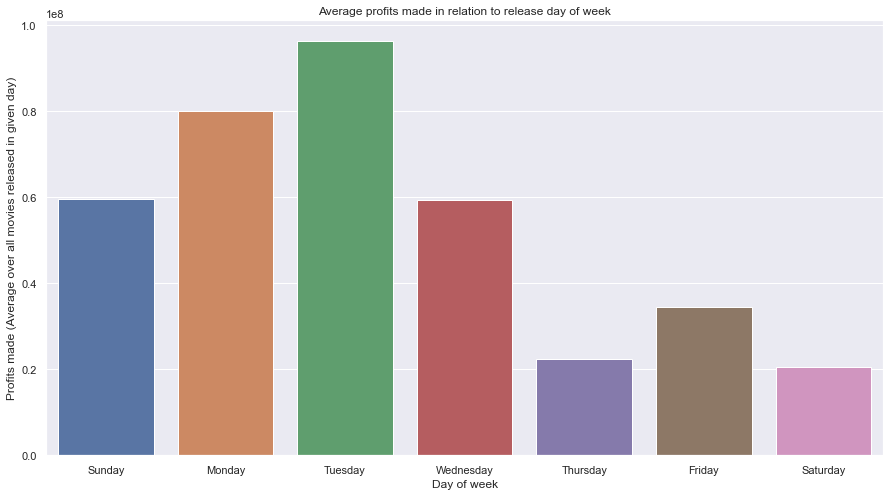

In [32]:
profit_by_dow = final_movies_df[final_movies_df["year"]>1990].groupby(["dow"]).profit.mean().reset_index()
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(x=days,y='profit',data=profit_by_dow)
plt.xlabel('Day of week')
plt.ylabel('Profits made (Average over all movies released in given day)')
plt.title('Average profits made in relation to release day of week')
plt.show()

#### notes:
This result at first felt quite counter-intuitive at first. My assumption was that it would be more skewed towards the weekend rather than the early weekdays. One of the reasons I can think of is that movies released on the early weekdays create a lot of "hype" and word-of-mouth advertisement which has a lot more people excited for the weekend to watch the movie. 

### Average runtime of movies per decade

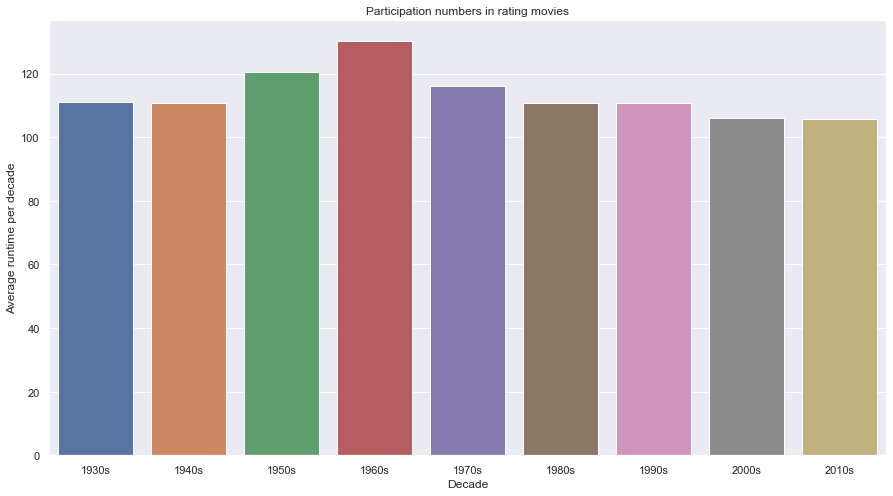

In [19]:
df = final_movies_df #temp manipulation
df_by_vote = df.groupby(['decade']).runtime.mean().reset_index()[1:] #remove 0s decade
sns.barplot(x='decade',y='runtime',data=df_by_vote)
plt.xlabel('Decade')
plt.ylabel('Average runtime per decade')
plt.title('Participation numbers in rating movies')
plt.show()

#### notes:
I guess overall, that's the interval of time where you can captivate a viewer's attention. From the looks of it, the result coincides with the 107 minutes overall average we discovered earlier. although after a high peak in the 1960s it started decreasing steadily. Especially in the 2000s as they have an all-time low average. Considering, that the trend is that we have shorter video content that we consume every day, we might be converging to even lower time intervals in the future.

### Vote counts per decade

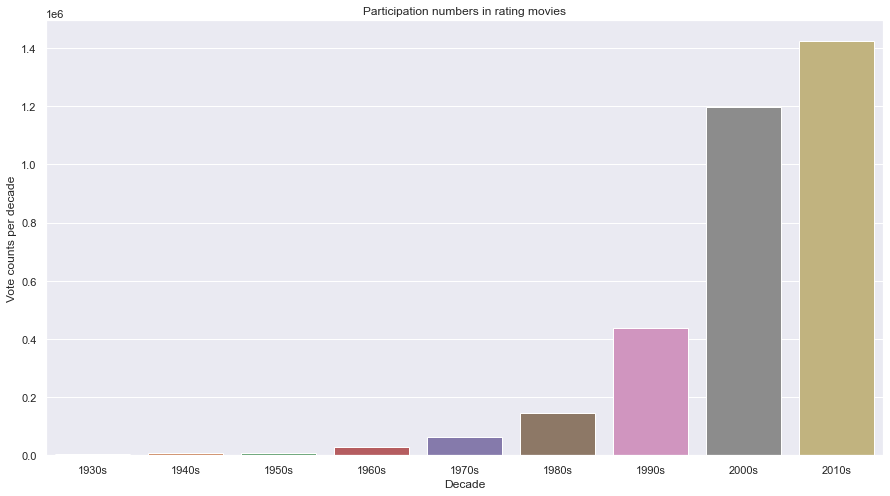

In [33]:
df = final_movies_df #temp manipulation
df_by_vote = df.groupby(['decade']).vote_count.sum().reset_index()[1:] #remove 0s decade
sns.barplot(x='decade',y='vote_count',data=df_by_vote)
plt.xlabel('Decade')
plt.ylabel('Vote counts per decade')
plt.title('Participation numbers in rating movies')
plt.show()

#### notes:
I think for once, the result was as I envisioned. We can clearly see the role technology plays in the vote counts as it evolved through time. One can only guess that at first, rating a movie would've been a tedious process for the viewers or only left to critics. But as time went by and the internet became accessible to everyone, more people became able to participate in the rating process. Also, some movies' popularities died in their decades so one can imagine that they didn't get the chance to be rated later on.

### average ratings per decade

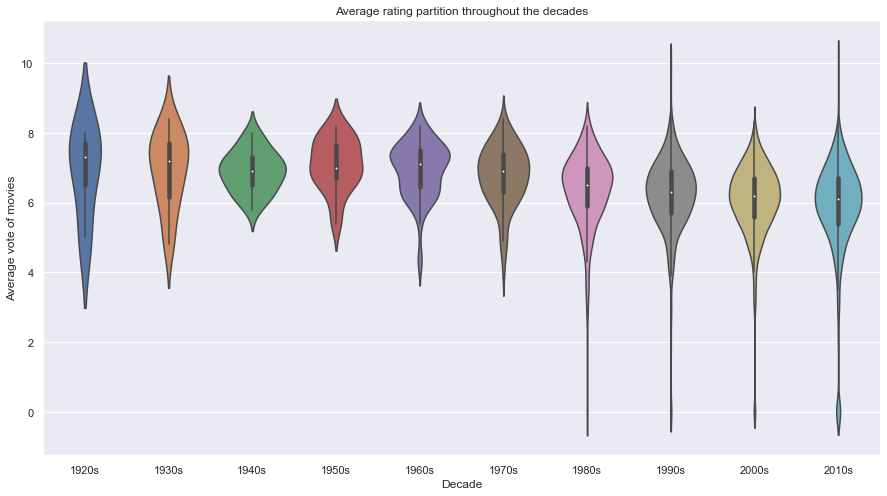

In [22]:
sns.violinplot(x='decade',y='vote_average',data=final_movies_df)
plt.title('Average rating partition throughout the decades')
plt.xlabel('Decade')
plt.ylabel('Average vote of movies')
plt.show()

#### notes:
This actually matches very well with a timeline where technology evolved and movie production became more accessible, as well as rating became more accessible. Through 1920s-1970s we can see a tight distribution of votes which corresponds to the low participation of viewers' in the voting process. As well as the fact that there isn't as many movies in that time compared to the last part of the 20th century and the start of the 21th century. But later on, as the industry grew, we can the spread of the ratings (especially the lows and highs) going as low as 0. As the barrier of entry became lower, we were bound to see catastrophically bad movies.

### Does the homepage existence affect revenues? (It appears that it does due to marketing visibility)

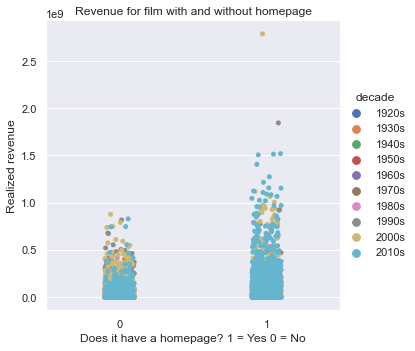

In [40]:
sns.catplot(x='has_homepage', y='revenue', hue='decade',data=final_movies_df)
plt.title('Revenue for film with and without homepage')
plt.xlabel('Does it have a homepage? 1 = Yes 0 = No')
plt.ylabel('Realized revenue')
plt.show()

#### notes:
The first thing to notice is that there seems to be an actual benefit to having a homepage as an advertisement tool. But, this effect seems to be limited to the movies from the 21st century as we can see in the second bar. All the movies that profited the most whilst having a homepage are from the 21st century aside from one movie from the 1990s.